In [1]:
from jax.lib import xla_bridge
print(xla_bridge.get_backend().platform)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


cpu


In [2]:
%load_ext autoreload
%autoreload 2
%pylab inline

import tensorflow as tf 
import numpy as np
from chainconsumer import ChainConsumer
import cmasher as cmr
import pickle
import os

'unset XLA_FLAGS'


Populating the interactive namespace from numpy and matplotlib


2023-05-16 14:17:37.888442: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/python-3.10.4/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


'unset XLA_FLAGS'

## Load data

In [3]:

sample_mse=[]
for filename in os.listdir("/gpfsdswork/projects/rech/ykz/ulm75uc/VMIM-vs-MSE-/data/diff_realizations/"):
        if filename.startswith("sample_nd") and filename.endswith("mse.pkl"):
            f=open(os.path.join('/gpfsdswork/projects/rech/ykz/ulm75uc/VMIM-vs-MSE-/data/diff_realizations/', filename), 'rb')
            sample_mse.append(pickle.load(f))
sample_mse=np.array(sample_mse)

In [4]:

sample_vmim=[]
for filename in os.listdir("/gpfsdswork/projects/rech/ykz/ulm75uc/VMIM-vs-MSE-/data/diff_realizations/"):
        if filename.startswith("sample_nd") and filename.endswith("vmim.pkl"):
            f=open(os.path.join('/gpfsdswork/projects/rech/ykz/ulm75uc/VMIM-vs-MSE-/data/diff_realizations/', filename), 'rb')
            sample_vmim.append(pickle.load(f))
sample_vmim=np.array(sample_vmim)

In [5]:
col = cmr.tropical
fid_params=np.array([0.2664, 0.0492, 0.831,0.6727,0.9645, -1.0])
name_parameters= ['$\Omega_c$', '$\Omega_b$', '$\sigma_8$', '$h_0$', '$n_s$', '$w_0$']


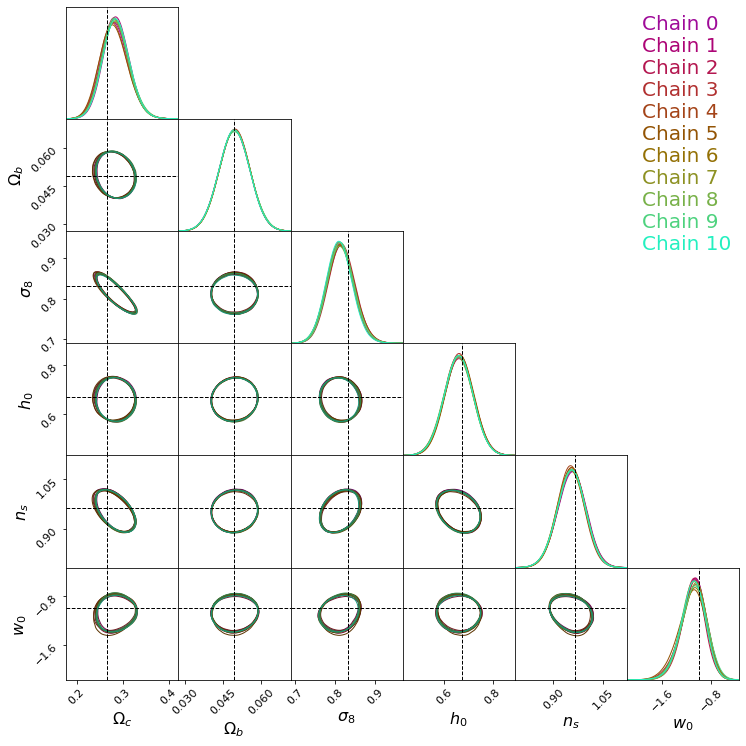

In [6]:
c = ChainConsumer()
for j in range(len(sample_mse)):
    c.add_chain([sample_mse[j,:,i] for i in range(6)], parameters= name_parameters)
c.configure(usetex=False,legend_kwargs={'fontsize': 20},max_ticks=3,tick_font_size=11, label_font_size=16,sigmas=[0,1],spacing=0.0,cmap=col)
fig = c.plotter.plot(truth=fid_params)
fig.set_size_inches(2 + fig.get_size_inches())


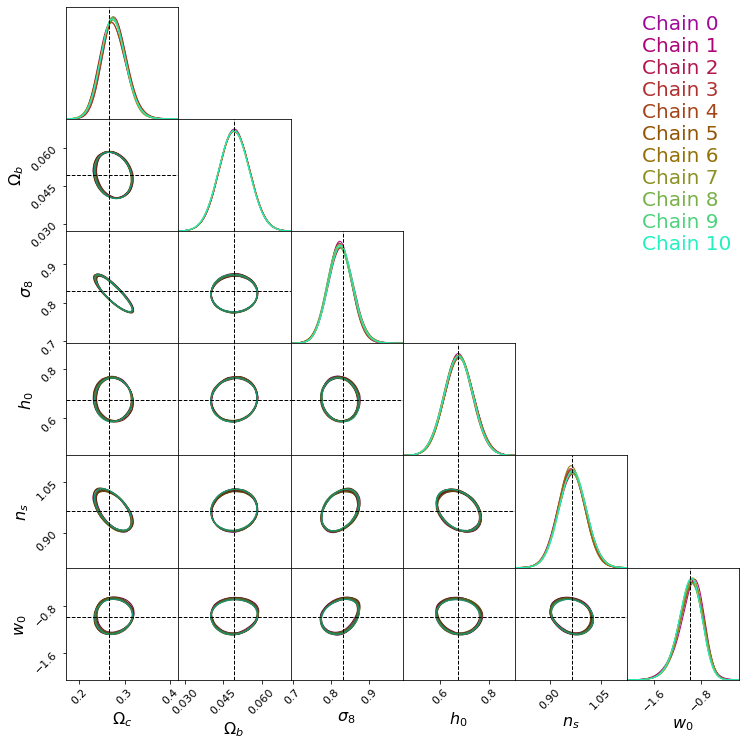

In [7]:
b = ChainConsumer()
for j in range(len(sample_vmim)):
    b.add_chain([sample_vmim[j,:,i] for i in range(6)], parameters= name_parameters)
b.configure(usetex=False,legend_kwargs={'fontsize': 20},max_ticks=3,tick_font_size=11, label_font_size=16,sigmas=[0,1],spacing=0.0,cmap=col)
fig = b.plotter.plot(truth=fid_params)
fig.set_size_inches(2 + fig.get_size_inches())
